Reporte básico en HTML
===

* *60 min* | Última modificación: Febrero 19, 2020.

En este tutorial se presenta el desarrollo de un reporte estático en HTML similar al ejemplo disponible para R Shiny en https://shiny.rstudio.com/gallery/telephones-by-region.html

![html-18](../../assets/html-18.png)

## Data

In [1]:
import pandas as pd

data = [[45939, 21574, 2876, 1815, 1646,   89,  555],
        [60423, 29990, 4708, 2568, 2366, 1411,  733],
        [64721, 32510, 5230, 2695, 2526, 1546,  773],
        [68484, 35218, 6662, 2845, 2691, 1663,  836],
        [71799, 37598, 6856, 3000, 2868, 1769,  911],
        [76036, 40341, 8220, 3145, 3054, 1905, 1008],
        [79831, 43173, 9053, 3338, 3224, 2005, 1076]]



data = pd.DataFrame(
    data = data,
    index = [1951, 1956, 1957, 1958, 1959, 1960, 1961],
    columns = ['N.Amer', 'Europe', 'Asia', 'S.Amer', 'Oceania', 'Africa', 'Mid.Amer']
)

data

,N.Amer,Europe,Asia,S.Amer,Oceania,Africa,Mid.Amer
1951,45939,21574,2876,1815,1646,89,555
1956,60423,29990,4708,2568,2366,1411,733
1957,64721,32510,5230,2695,2526,1546,773
1958,68484,35218,6662,2845,2691,1663,836
1959,71799,37598,6856,3000,2868,1769,911
1960,76036,40341,8220,3145,3054,1905,1008
1961,79831,43173,9053,3338,3224,2005,1076


## Generación de las figuras

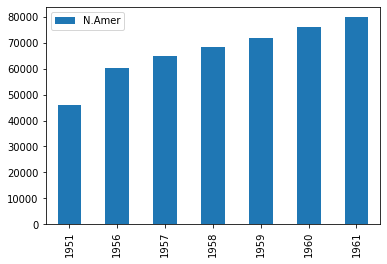

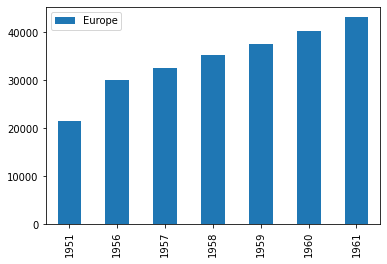

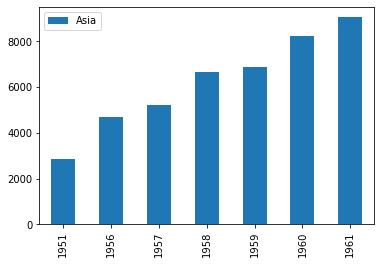

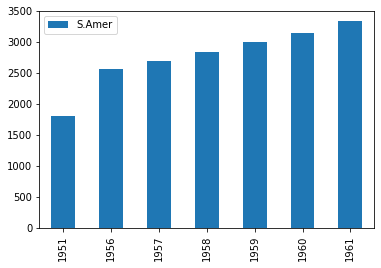

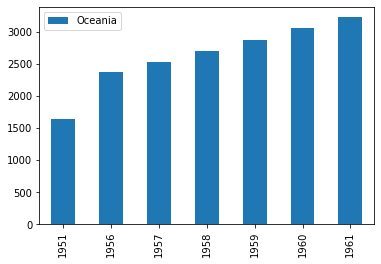

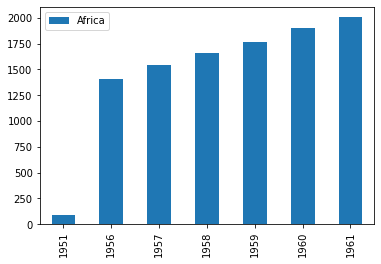

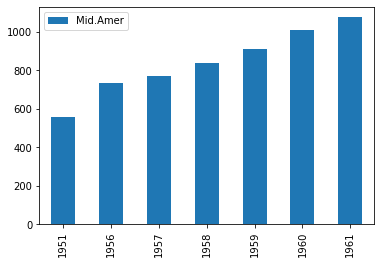

In [2]:
for col in data.columns:
    fig = data.plot.bar(y=col).get_figure().savefig('figs/' + col + '.png')

**Actividad.---** Modifique el código para que las gráficas generadas en Python sean similares a las realizadas en R Shiny.

## Version 1 --- Menu 

In [3]:
%%writefile index.html

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>Telephones</title>    
    </head>
    <body>
        <!--- Menu de seleccion al lado izquierdo --->
        <nav>
            <p>Region:</p>
                
            <!--- onchange llama la función cuando el elemento cambia --->
            <select id="region" name="region"  onchange="selectPlot()">
            
                <option value="N.Amer">N.Amer</option>
                <option value="Europe">Europe</option>
                <option value="Asia">Asia</option>
                <option value="S.Amer">S.Amer</option>
                <option value="Oceania">Oceania</option>
                <option value="Africa">Africa</option>
                <option value="Mid.Amer">Mid.Amer</option>
                
            </select>
        </nav>
        <script>
            function selectPlot() {
                
                <!--- obtiene el elemento seleccionado en el menu --->
                var region = document.getElementById("region").value;
                
                <!--- imprime un mensaje para depurar el código --->
                window.alert("Region seleccionada: " + region);
            }
        </script>
    </body>
</html>

Overwriting index.html


![html-1](../../assets/html-16.png)

## Versión 2 --- Gráficos

In [4]:
%%writefile index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Telephones</title>    
  </head>
  <body>
    <nav>
      <p>Region:</p>
      <select id="region" name="region"  onchange="selectPlot()">
        <option value="N.Amer">N.Amer</option>
        <option value="Europe">Europe</option>
        <option value="Asia">Asia</option>
        <option value="S.Amer">S.Amer</option>
        <option value="Oceania">Oceania</option>
        <option value="Africa">Africa</option>
        <option value="Mid.Amer">Mid.Amer</option>
      </select>
    </nav>
       
    <div>        
      <div class="myImage" id="N.Amer"   style="display:block"> <img src="figs/N.Amer.png"   alt="N.Amer">   </div>
      <div class="myImage" id="Europe"   style="display:none">  <img src="figs/Europe.png"   alt="Europe">   </div>
      <div class="myImage" id="Asia"     style="display:none">  <img src="figs/Asia.png"     alt="Asia">     </div>
      <div class="myImage" id="S.Amer"   style="display:none">  <img src="figs/S.Amer.png"   alt="S.Amer">   </div>
      <div class="myImage" id="Oceania"  style="display:none">  <img src="figs/Oceania.png"  alt="Oceania">  </div>
      <div class="myImage" id="Africa"   style="display:none">  <img src="figs/Africa.png"   alt="Africa">   </div>
      <div class="myImage" id="Mid.Amer" style="display:none">  <img src="figs/Mid.Amer.png" alt="Mid.Amer"> </div>
    </div>
        
    <script>
      function selectPlot() {
        var region = document.getElementById("region").value;
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == region) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>

Overwriting index.html


## Version 3 --- Estilo

In [5]:
%%writefile index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Telephones</title>    
  </head>
  <body>
    
    <!--- Se resaltan los bordes de los bloques para realizar el diseño --->
    
    <header  style="border:1px solid black; border-width:2px;">
      <h2>Telephones by region</h2>
    </header>
    
    <nav style="border:1px solid red; border-width:2px;">
      <p>Region:</p>
      <select id="region" name="region"  onchange="selectPlot()">
        <option value="N.Amer">N.Amer</option>
        <option value="Europe">Europe</option>
        <option value="Asia">Asia</option>
        <option value="S.Amer">S.Amer</option>
        <option value="Oceania">Oceania</option>
        <option value="Africa">Africa</option>
        <option value="Mid.Amer">Mid.Amer</option>
      </select>
    </nav>
       
    <div style="border:1px solid blue; border-width:2px;">        
      <div class="myImage" id="N.Amer"   style="display:block"> <img src="figs/N.Amer.png"   alt="N.Amer">   </div>
      <div class="myImage" id="Europe"   style="display:none">  <img src="figs/Europe.png"   alt="Europe">   </div>
      <div class="myImage" id="Asia"     style="display:none">  <img src="figs/Asia.png"     alt="Asia">     </div>
      <div class="myImage" id="S.Amer"   style="display:none">  <img src="figs/S.Amer.png"   alt="S.Amer">   </div>
      <div class="myImage" id="Oceania"  style="display:none">  <img src="figs/Oceania.png"  alt="Oceania">  </div>
      <div class="myImage" id="Africa"   style="display:none">  <img src="figs/Africa.png"   alt="Africa">   </div>
      <div class="myImage" id="Mid.Amer" style="display:none">  <img src="figs/Mid.Amer.png" alt="Mid.Amer"> </div>
    </div>
        
    <script>
      function selectPlot() {
        var region = document.getElementById("region").value;
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == region) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>

Overwriting index.html


![html-17](../../assets/html-17.png)

In [6]:
%%writefile index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Telephones</title>    
    
    <!--- se adiciona el estilo usando CSS --->
    <style>
    
        body {
          font-family: Arial, Helvetica, sans-serif;
        }
        
        header {
            font-size: 20px;
        }
        
        nav {
          float: left;
          width: 20%;
          height: 150px;
          background: #eeeeee;
          padding: 20px;
        }
    
    </style>
    <!-- fin de la definición de estilo --->
    
  </head>
  <body>
    
    <header  style="border:1px solid black; border-width:2px;">
      <h2>Telephones by region</h2>
    </header>
    
    <nav style="border:1px solid red; border-width:2px;">
      <p>Region:</p>
      <select id="region" name="region"  onchange="selectPlot()">
        <option value="N.Amer">N.Amer</option>
        <option value="Europe">Europe</option>
        <option value="Asia">Asia</option>
        <option value="S.Amer">S.Amer</option>
        <option value="Oceania">Oceania</option>
        <option value="Africa">Africa</option>
        <option value="Mid.Amer">Mid.Amer</option>
      </select>
      <br>
      <hr>
      <p> Data from AT&T (1961) The World's Telephones. </p>
    </nav>
       
    <div style="border:1px solid blue; border-width:2px;">        
      <div class="myImage" id="N.Amer"   style="display:block"> <img src="figs/N.Amer.png"   alt="N.Amer">   </div>
      <div class="myImage" id="Europe"   style="display:none">  <img src="figs/Europe.png"   alt="Europe">   </div>
      <div class="myImage" id="Asia"     style="display:none">  <img src="figs/Asia.png"     alt="Asia">     </div>
      <div class="myImage" id="S.Amer"   style="display:none">  <img src="figs/S.Amer.png"   alt="S.Amer">   </div>
      <div class="myImage" id="Oceania"  style="display:none">  <img src="figs/Oceania.png"  alt="Oceania">  </div>
      <div class="myImage" id="Africa"   style="display:none">  <img src="figs/Africa.png"   alt="Africa">   </div>
      <div class="myImage" id="Mid.Amer" style="display:none">  <img src="figs/Mid.Amer.png" alt="Mid.Amer"> </div>
    </div>
        
    <script>
      function selectPlot() {
        var region = document.getElementById("region").value;
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == region) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>

Overwriting index.html


![html-17](../../assets/html-19.png)

## Version 4 --- Detalles del estilo 

In [7]:
%%writefile index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Telephones</title>    
    
    <style>
    
        body {
          font-family: Arial, Helvetica, sans-serif;
          padding-left: 10px;
        }
        
        header {
            font-size: 20px;
        }
        
        nav {
          float: left;
          width: 20%;
          height: 150px;
          background: #eeeeee;
          padding: 20px;
        }
        
        .seltext {
            font-weight: bold;
        }
        
        .auxtext {
            font-size: 14px;
            color: #807F7F;
        }
    
    </style>
    
  </head>
  <body>
    
    <header>
      <h2>Telephones by region</h2>
    </header>
    
    <nav style="border:1px solid #BEBDBD; border-width:2px;">
      <p class="seltext">Region:</p>
      <select id="region" name="region"  onchange="selectPlot()">
        <option value="N.Amer">N.Amer</option>
        <option value="Europe">Europe</option>
        <option value="Asia">Asia</option>
        <option value="S.Amer">S.Amer</option>
        <option value="Oceania">Oceania</option>
        <option value="Africa">Africa</option>
        <option value="Mid.Amer">Mid.Amer</option>
      </select>
      <br>
      <hr>
      <p class="auxtext"> Data from AT&T (1961) The World's Telephones. </p>
    </nav>
       
    <div>
      <div class="myImage" id="N.Amer"   style="display:block"> <img src="figs/N.Amer.png"   alt="N.Amer">   </div>
      <div class="myImage" id="Europe"   style="display:none">  <img src="figs/Europe.png"   alt="Europe">   </div>
      <div class="myImage" id="Asia"     style="display:none">  <img src="figs/Asia.png"     alt="Asia">     </div>
      <div class="myImage" id="S.Amer"   style="display:none">  <img src="figs/S.Amer.png"   alt="S.Amer">   </div>
      <div class="myImage" id="Oceania"  style="display:none">  <img src="figs/Oceania.png"  alt="Oceania">  </div>
      <div class="myImage" id="Africa"   style="display:none">  <img src="figs/Africa.png"   alt="Africa">   </div>
      <div class="myImage" id="Mid.Amer" style="display:none">  <img src="figs/Mid.Amer.png" alt="Mid.Amer"> </div>
    </div>
        
    <script>
      function selectPlot() {
        var region = document.getElementById("region").value;
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == region) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>

Overwriting index.html


![html-20](../../assets/html-20.png)

**Actividad.---** Construya una página web que mimifique la funcionalidad de la siguiente app de Shiny:

https://shiny.rstudio.com/gallery/button-styler.html